# IT Academy - Data Science with Python
## Sprint 12: Supervised Regressions
### [Github Supervised Regressions](https://github.com/jesussantana/Supervised-Regression)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Supervised-Regression.svg)](https://wakatime.com/badge/github/jesussantana/Supervised-Regression)

In [1]:
"""%pip install tabulate
%pip install scikit-optimize
%pip install fitter
%pip install missingno"""


'%pip install tabulate\n%pip install scikit-optimize\n%pip install fitter\n%pip install missingno'

In [2]:
# Data treatment
# ==============================================================================
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
from datetime import datetime
from tabulate import tabulate
import missingno as msno

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from IPython.display import Image

# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats.mstats import gmean,hmean

from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, euclidean_distances

from sklearn.inspection import permutation_importance

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Various
# ==============================================================================
import time
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

In [3]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

### Exercise 1: 
  - Create at least three different regression models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

### Exercise 2: 
  - Compare them based on MSE and R2.

### Exercise 3: 
  - Train them using the different parameters they support

### Exercise 4: 
  - Compare your performance using the traint / test approach or using all data (internal validation)

In [4]:
df = df_raw.copy()

## Exploratory analysis

In [5]:
df.head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0   2211.0        2225            WN        335  N712SW              128.0   
1   1002.0        1000            WN       3231  N772SW              128.0   
2    804.0         750            WN        448  N428WN               96.0   
3   1959.0        1925            WN       3920  N464WN               90.0   
4   2121.0        2110            WN        378  N726SW              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0   
1           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0   
2            90.0     76.0      14.0       8.0    IND  BWI       515     3.0   
3            90.0     77.0      34.0      34.0    IND  BWI       515     3.0   
4           115.0     87.0      11.0      25.0    IND  JAX       688     4.0   

   TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
0      8.0          0                N         0           NaN           NaN   
1     10.0          0                N         0           NaN           NaN   
2     17.0          0                N         0           NaN           NaN   
3     10.0          0                N         0           2.0           0.0   
4     10.0          0                N         0           NaN           NaN   

   NASDelay  SecurityDelay  LateAircraftDelay  
0       NaN            NaN                NaN  
1       NaN            NaN                NaN  
2       NaN            NaN                NaN  
3       0.0            0.0               32.0  
4       NaN            NaN                NaN

In [6]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [7]:
df = df_raw.loc[:,["ArrDelay","ArrTime","AirTime", "Distance", "TaxiIn", "TaxiOut", "DayOfWeek", "DepDelay","CarrierDelay", 'UniqueCarrier']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ArrDelay       float64
 1   ArrTime        float64
 2   AirTime        float64
 3   Distance       int64  
 4   TaxiIn         float64
 5   TaxiOut        float64
 6   DayOfWeek      int64  
 7   DepDelay       float64
 8   CarrierDelay   float64
 9   UniqueCarrier  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 147.8+ MB


In [9]:
df.shape

(1936758, 10)

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.isna().sum().sort_values()

Distance              0
DayOfWeek             0
DepDelay              0
UniqueCarrier         0
TaxiOut             455
ArrTime            7110
TaxiIn             7110
ArrDelay           8387
AirTime            8387
CarrierDelay     689270
dtype: int64

In [12]:
def preprocess(X):
    X["Flight"] = X["Origin"] + "-" + X["Dest"]
    X["Hour"] = X["DepTime"] // 100
    X = X.drop(["DayofMonth"], axis=1)
    


    airport_to_state = pd.read_csv("../input/airport-to-statecsv/airport_to_state.csv", usecols=["airport", "state"])
    X = X.merge(airport_to_state, left_on="Origin", right_on="airport", how="left")
    if "dep_delayed_15min" in X.columns:
        X["dep_delayed_15min"] = X["dep_delayed_15min"].map({"Y": 1, "N":0})
    
    return X

- Sample Dataframe

In [13]:
df = df.sample(frac=0.001, random_state = 6858)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ArrDelay       1931 non-null   float64
 1   ArrTime        1931 non-null   float64
 2   AirTime        1931 non-null   float64
 3   Distance       1937 non-null   int64  
 4   TaxiIn         1931 non-null   float64
 5   TaxiOut        1936 non-null   float64
 6   DayOfWeek      1937 non-null   int64  
 7   DepDelay       1937 non-null   float64
 8   CarrierDelay   1269 non-null   float64
 9   UniqueCarrier  1937 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 166.5+ KB


In [15]:
df.shape

(1937, 10)

## Distribution of the response variable

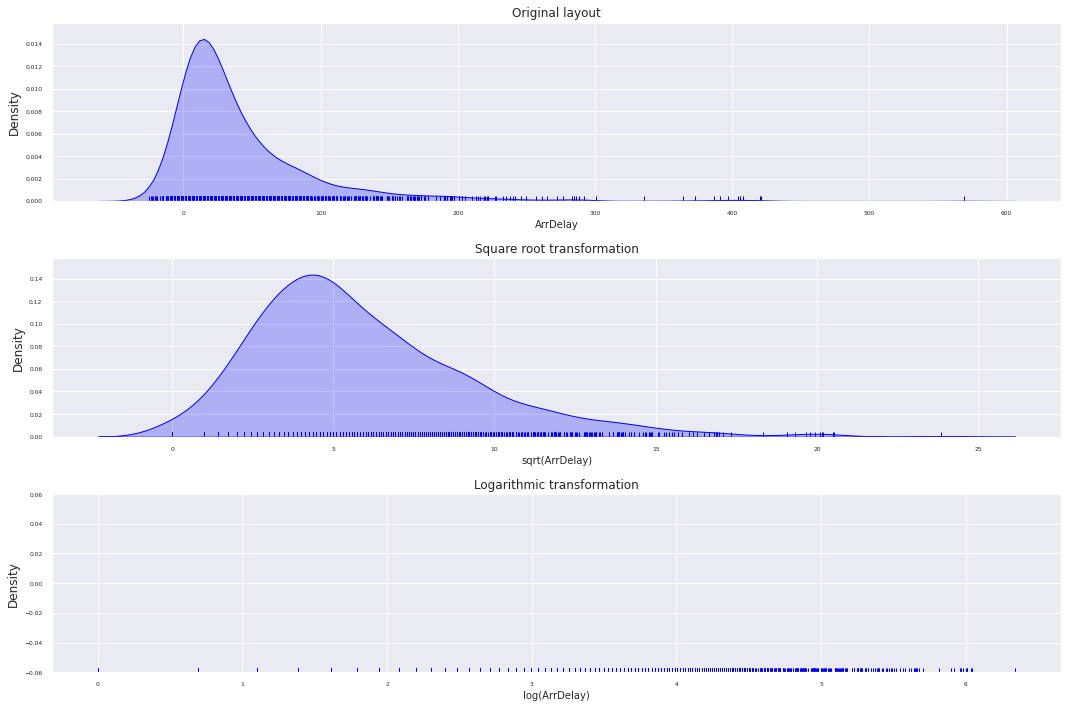

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.ArrDelay,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrDelay', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrDelay)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrDelay)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

## Numerical variables

In [17]:
df.select_dtypes(include=['float64', 'int']).describe()

ArrDelay      ArrTime      AirTime     Distance       TaxiIn  \
count  1931.000000  1931.000000  1931.000000  1937.000000  1931.000000   
mean     42.473848  1619.844640   106.201968   749.701600     6.686173   
std      56.640112   549.546968    67.079109   569.053389     4.469692   
min     -25.000000     2.000000    14.000000    45.000000     1.000000   
25%       9.000000  1334.000000    56.000000   334.000000     4.000000   
50%      24.000000  1730.000000    88.000000   594.000000     6.000000   
75%      55.000000  2029.500000   134.000000   984.000000     8.000000   
max     569.000000  2359.000000   370.000000  3329.000000    44.000000   

           TaxiOut    DayOfWeek     DepDelay  CarrierDelay  
count  1936.000000  1937.000000  1937.000000   1269.000000  
mean     18.018595     3.979350    43.697470     18.381403  
std      13.465994     1.954701    53.677347     42.626851  
min       1.000000     1.000000     6.000000      0.000000  
25%      10.000000     2.000000    12.000000      0.000000  
50%      14.000000     4.000000    24.000000      1.000000  
75%      21.000000     5.000000    53.000000     19.000000  
max     137.000000     7.000000   571.000000    569.000000

Text(0.5, 0.98, 'Distribution Numerical Variable')

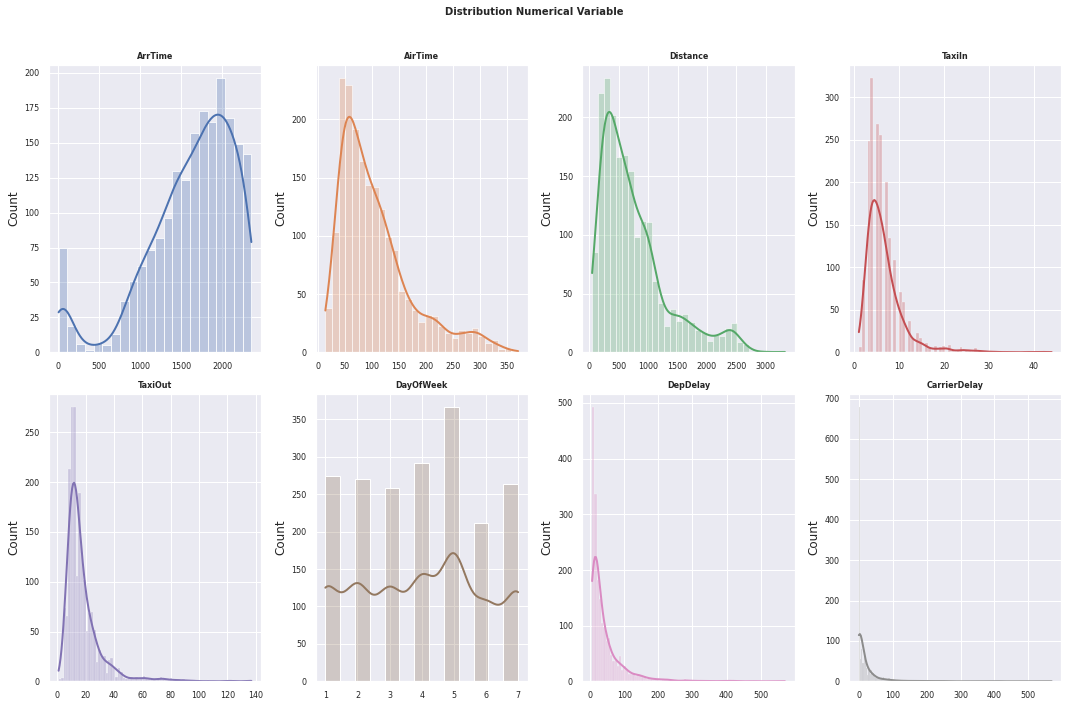

In [18]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 10, fontweight = "bold")

Text(0.5, 0.98, 'Correlation with ArrDelay')

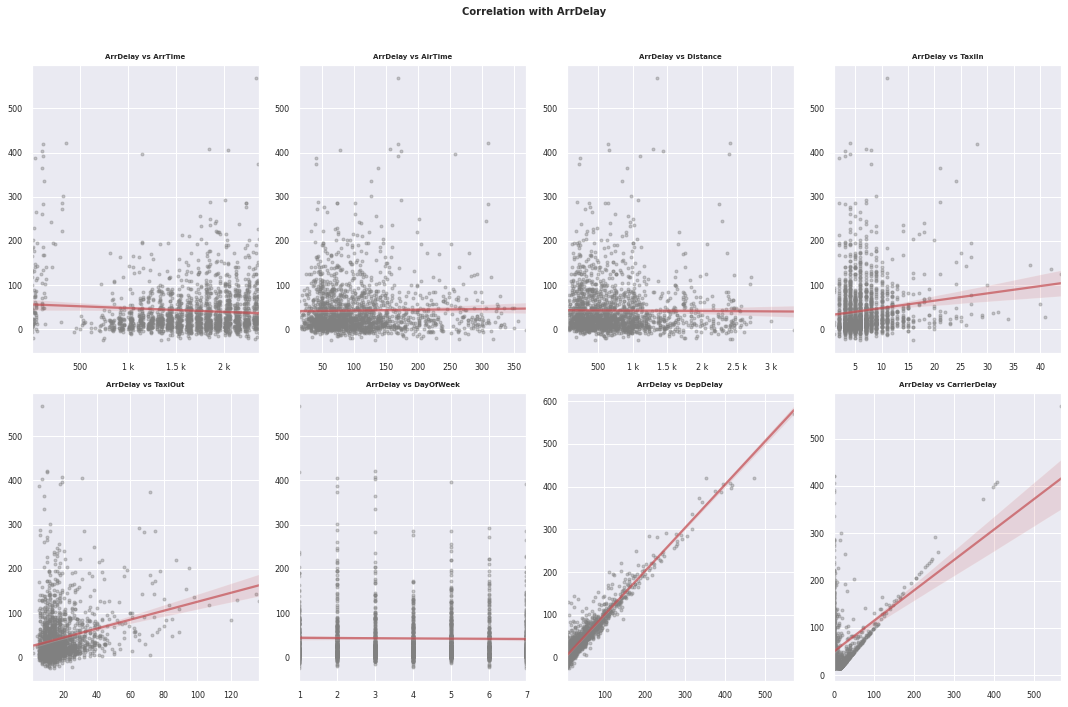

In [19]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Se eliminan los axes vacíos
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 10, fontweight = "bold")

## Numerical variables correlation

In [20]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

variable_1    variable_2         r     abs_r
29      Distance       AirTime  0.981996  0.981996
21       AirTime      Distance  0.981996  0.981996
7       ArrDelay      DepDelay  0.959996  0.959996
63      DepDelay      ArrDelay  0.959996  0.959996
79  CarrierDelay      DepDelay  0.481901  0.481901
71      DepDelay  CarrierDelay  0.481901  0.481901
72  CarrierDelay      ArrDelay  0.451189  0.451189
8       ArrDelay  CarrierDelay  0.451189  0.451189
5       ArrDelay       TaxiOut  0.240119  0.240119
45       TaxiOut      ArrDelay  0.240119  0.240119

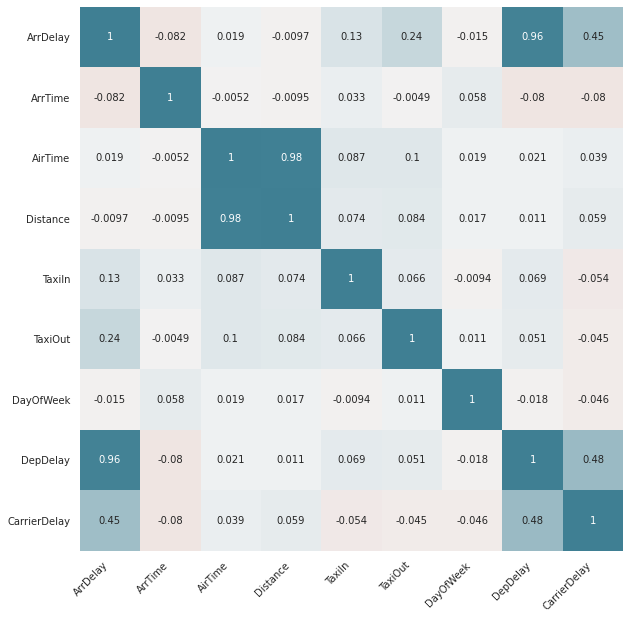

In [21]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

## Qualitative variables

In [22]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

UniqueCarrier
count           1937
unique            20
top               WN
freq             388

Text(0.5, 0.98, 'Qualitative variable distribution')

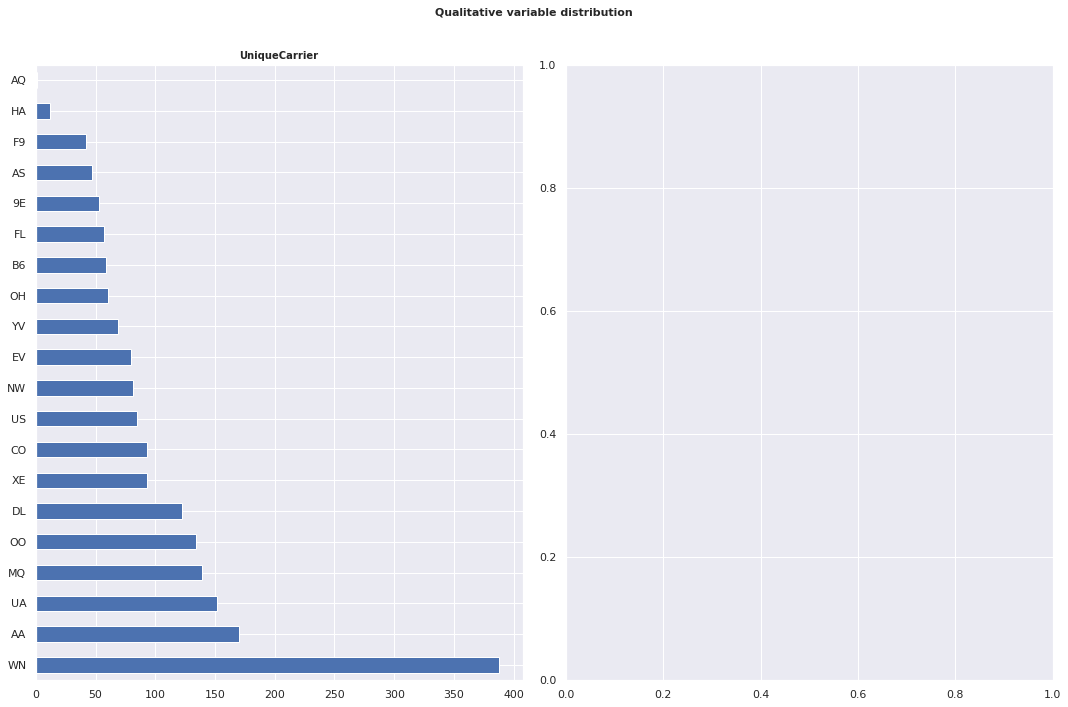

In [23]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 11, fontweight = "bold")

Text(0.5, 0.98, 'ArrDelay distribution by group')

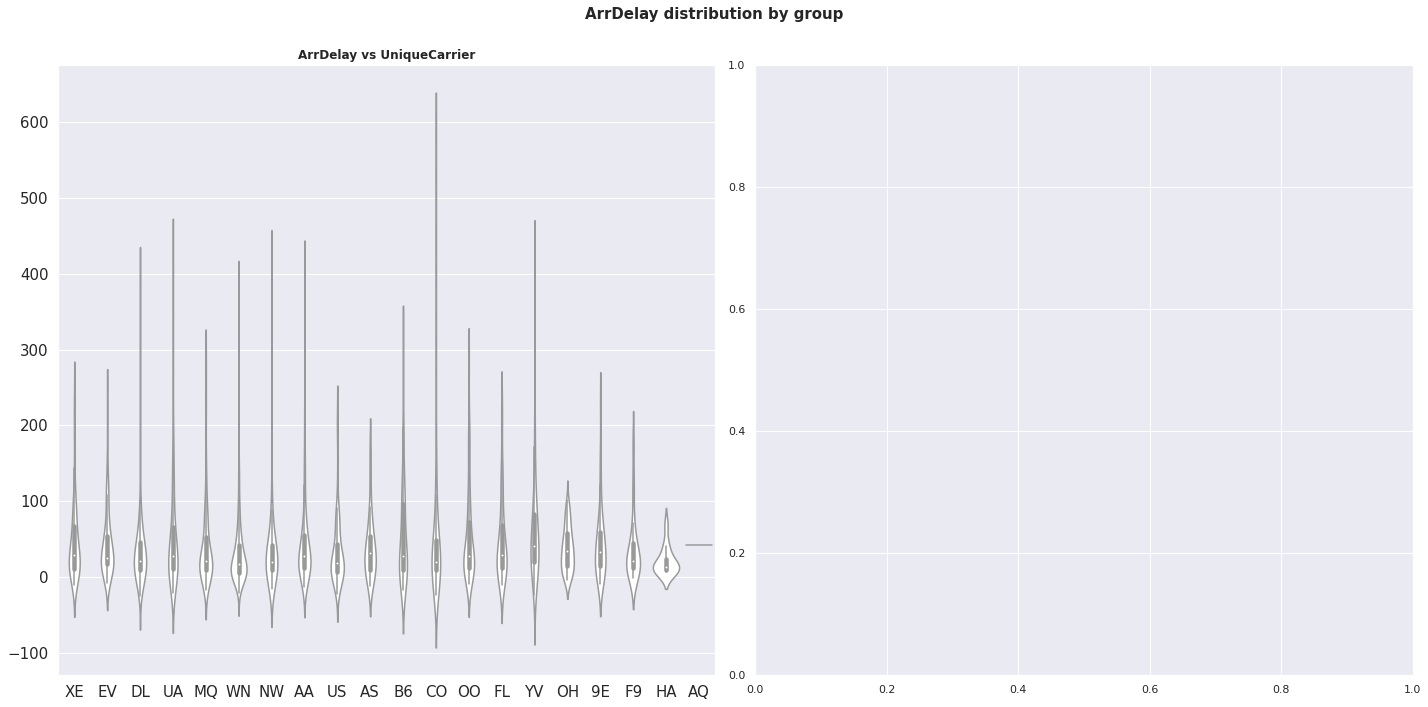

In [24]:
# Graph relationship between the price and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ArrDelay',
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 12, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 15, fontweight = "bold")

## Create Categorical Dummies

In [25]:
import categorical 

df = categorical.transform(df, "UniqueCarrier")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ArrDelay          1931 non-null   float64
 1   ArrTime           1931 non-null   float64
 2   AirTime           1931 non-null   float64
 3   Distance          1937 non-null   int64  
 4   TaxiIn            1931 non-null   float64
 5   TaxiOut           1936 non-null   float64
 6   DayOfWeek         1937 non-null   int64  
 7   DepDelay          1937 non-null   float64
 8   CarrierDelay      1269 non-null   float64
 9   UniqueCarrier_9E  1937 non-null   uint8  
 10  UniqueCarrier_AA  1937 non-null   uint8  
 11  UniqueCarrier_AQ  1937 non-null   uint8  
 12  UniqueCarrier_AS  1937 non-null   uint8  
 13  UniqueCarrier_B6  1937 non-null   uint8  
 14  UniqueCarrier_CO  1937 non-null   uint8  
 15  UniqueCarrier_DL  1937 non-null   uint8  
 16  UniqueCarrier_EV  1937 non-null   ui

## Imputation of missing values

In [27]:
df.isnull().sum().sum()

693

In [28]:
import missing

In [29]:
df[:] = missing.transform(df[:])

In [30]:
df.isnull().sum().sum()

0

## Identify which distribution the data best fit 

In [31]:
distributions = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']
fitter = Fitter(df.ArrTime, distributions=distributions)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

sumsquare_error          aic           bic  kl_div
beta             0.000014  1631.204095 -36287.796917     inf
powerlaw         0.000014  1625.219274 -36250.262392     inf
logistic         0.000015  1687.053941 -36099.668529     inf
norm             0.000016  1667.226786 -36036.606048     inf
gamma            0.000016  1662.232520 -35973.267499     inf
chi2             0.000017  1665.253146 -35953.778575     inf
cauchy           0.000017  1715.340243 -35920.493406     inf
expon            0.000032  1627.457675 -34714.130214     inf
exponpow         0.000040          inf -34260.708862     NaN

## Divide the data set into training set and test set

In [32]:
# Matrix
X = df.drop('ArrDelay', axis = 'columns')
# Vector
y = df['ArrDelay']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

In [34]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count    1549.000000
mean       42.855289
std        56.174977
min       -24.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       569.000000
Name: ArrDelay, dtype: float64


In [35]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count    388.000000
mean      40.951031
std       58.083075
min      -25.000000
25%        9.000000
50%       24.000000
75%       48.500000
max      408.000000
Name: ArrDelay, dtype: float64


# Linear regressions Internal, External

## Create a Model

In [36]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Intern
regr_INT = linear_model.LinearRegression()
regr_INT.fit(X,y)
pred_INT = regr_INT.predict(X)
print("R2 Intern: %.4f" % r2_score(y, pred_INT))
print("MSE: %.4f" % mean_squared_error(y, pred_INT))

# Extern
regr_EXT = linear_model.LinearRegression()
regr_EXT.fit(X_train,y_train)
pred_EXT = regr_EXT.predict(X_test)
print("\nR2 Extern: %.4f" %  r2_score(y_test, pred_EXT))
print("MSE Extern: %.4f" %  mean_squared_error(y_test, pred_EXT))

R2 Intern: 0.9615
MSE: 123.1748

R2 Extern: 0.9765
MSE Extern: 78.9628


- View training results

In [37]:
"""plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regr_EXT.predict(X_train), color = "blue")
plt.title("Departure Delay vs Arrived Delay (Trainning Set)")
plt.xlabel("Departure Delay")
plt.ylabel("Arrived Delay")
plt.show()"""

'plt.scatter(X_train, y_train, color = "red")\nplt.plot(X_train, regr_EXT.predict(X_train), color = "blue")\nplt.title("Departure Delay vs Arrived Delay (Trainning Set)")\nplt.xlabel("Departure Delay")\nplt.ylabel("Arrived Delay")\nplt.show()'

# Multiple Linear Regression

In [38]:
# Matrix
X = df.values
# Vector
y = df.iloc[:, 0].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

In [40]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regression.predict(X_test)

- Build the optimal RLM model

In [42]:
import statsmodels.api as sm

In [43]:
X_opt = X[:, [1, 2, 3, 4, 5, 6]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2, 3, 4]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.317
Model:                            OLS   Adj. R-squared (uncentered):              0.316
Method:                 Least Squares   F-statistic:                              449.0
Date:                Wed, 26 May 2021   Prob (F-statistic):                   6.51e-161
Time:                        11:25:02   Log-Likelihood:                         -10628.
No. Observations:                1937   AIC:                                  2.126e+04
Df Residuals:                    1935   BIC:                                  2.127e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0155      0.001     11.986      0.000       0.013       0.018
x2             0.1213      0.018      6.874      0.000       0.087       0.156
==============================================================================
Omnibus:                     1246.380   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15518.669
Skew:                           2.887   Prob(JB):                         0.00
Kurtosis:                      15.607   Cond. No.                         22.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Build the optimal RLM model using Automatic Backward Elimination

In [44]:
def backwardElimination(x, sl):    
    numVars = len(x[0])    
    for i in range(0, numVars):        
        regressor_OLS = sm.OLS(y, x.tolist()).fit()        
        maxVar = max(regressor_OLS.pvalues).astype(float)        
        if maxVar > sl:            
            for j in range(0, numVars - i):                
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):                    
                    x = np.delete(x, j, 1)    
        
    return x, regressor_OLS.summary()
 
SL = 0.05
X_opt = X[:, [1, 2, 3, 4, 5, 6]]
X_Modeled, summary = backwardElimination(X_opt, SL)

In [45]:
X_Modeled

array([[  56.,  370.,    6.,   13.],
       [ 100.,  317.,   12.,   17.],
       [ 302., 2105.,    8.,   18.],
       ...,
       [  57.,  248.,    4.,   14.],
       [  45.,  256.,    6.,    6.],
       [  42.,  190.,    3.,   22.]])

In [46]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.412
Model:                            OLS   Adj. R-squared (uncentered):              0.411
Method:                 Least Squares   F-statistic:                              338.4
Date:                Wed, 26 May 2021   Prob (F-statistic):                   6.17e-221
Time:                        11:25:03   Log-Likelihood:                         -10483.
No. Observations:                1937   AIC:                                  2.097e+04
Df Residuals:                    1933   BIC:                                  2.100e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5707      0.081      7.062      0.000       0.412       0.729
x2            -0.0668      0.010     -6.731      0.000      -0.086      -0.047
x3             1.7632      0.248      7.101      0.000       1.276       2.250
x4             1.0485      0.086     12.233      0.000       0.880       1.217
==============================================================================
Omnibus:                     1383.484   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24115.506
Skew:                           3.201   Prob(JB):                         0.00
Kurtosis:                      19.057   Cond. No.                         193.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# KFold

In [47]:
df_sample = df.sample(frac=1).head(5000)

df_sample = df_sample.reset_index() # Important to reset index when doing random selection

X = df_sample[["ArrTime","AirTime", "Distance", "DepDelay"]]
y = df_sample["ArrDelay"]

In [48]:
# Replicate the above process multiple times 
from sklearn.model_selection import KFold 

kf = KFold(n_splits= 10, shuffle = True)  # partitions / mixing data

kf.get_n_splits(X) # concrete partitions

10

In [49]:
# fit a linear regression model
#regr = linear_model.LinearRegression()
regr_INT = linear_model.LinearRegression()
regr_EXT = linear_model.LinearRegression()
resultados_Interno = []
resultados_Externo = []

for train_index, test_index in kf.split(X):  # index
    X_train, X_test = X.loc[train_index,], X.loc[test_index] # external validation objects
    y_train, y_test = y[train_index], y[test_index]
    """regr.fit(X_train, y_train)  #ajustar el modelo
    predicciones = regr.predict(X_test)  # prediciones test
    print("R2: %.4f" %  r2_score(y_test, predicciones))  # evaluar con test
    print("MSE: %.4f" %  mean_squared_error(y_test, predicciones))"""

    # Extern

    regr_EXT.fit(X_train,y_train)
    pred_EXT = regr_EXT.predict(X_test)
    print("\nR2 Extern: %.4f" %  r2_score(y_test, pred_EXT))
    print("MSE Extern: %.4f" %  mean_squared_error(y_test, pred_EXT))

    resultados_Externo.append(r2_score(y_test, pred_EXT))


"""for train_index, test_index in kf.split(X):  # indices
    X_train, X_test = X.loc[train_index,], X.loc[test_index] # external validation objects
    y_train, y_test = y[train_index], y[test_index]"""


print("\nR2 medio: %.4f"% np.mean(resultados_Externo))

    # Intern

regr_INT.fit(X,y)
pred_INT = regr_INT.predict(X)
print("\nR2 Intern: %.4f" % r2_score(y, pred_INT))
print("MSE: %.4f" % mean_squared_error(y, pred_INT))

"""resultados_Interno.append(r2_score(y_test, pred_INT)) 

print("R2 medio: %.4f"% np.mean(resultados_Interno))"""


R2 Extern: 0.9424
MSE Extern: 200.0997

R2 Extern: 0.9246
MSE Extern: 302.6383

R2 Extern: 0.8771
MSE Extern: 329.6186

R2 Extern: 0.9516
MSE Extern: 164.2773

R2 Extern: 0.9041
MSE Extern: 384.4932

R2 Extern: 0.9322
MSE Extern: 188.0111

R2 Extern: 0.9304
MSE Extern: 233.1674

R2 Extern: 0.9401
MSE Extern: 201.7840

R2 Extern: 0.8541
MSE Extern: 273.2026

R2 Extern: 0.8926
MSE Extern: 312.8781

R2 medio: 0.9149

R2 Intern: 0.9202
MSE: 255.0051


'resultados_Interno.append(r2_score(y_test, pred_INT)) \n\nprint("R2 medio: %.4f"% np.mean(resultados_Interno))'

In [50]:
# How dependent is the evaluation of the model in relation to the train set, test used

# Polynomial Regression

In [51]:
df.head()

ArrDelay  ArrTime  AirTime  Distance  TaxiIn  TaxiOut  DayOfWeek  \
32721        81.0   1417.0     56.0     370.0     6.0     13.0        2.0   
480545       26.0   1932.0    100.0     317.0    12.0     17.0        4.0   
879313       20.0   1031.0    302.0    2105.0     8.0     18.0        1.0   
1670776      16.0   1731.0     42.0     236.0     7.0     14.0        6.0   
1464310     173.0   2322.0    280.0    2367.0     6.0     10.0        5.0   

         DepDelay  CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  \
32721        92.0           0.0               0.0               0.0   
480545        8.0           8.0               0.0               0.0   
879313       13.0           0.0               0.0               0.0   
1670776      29.0           0.0               0.0               0.0   
1464310     176.0           0.0               0.0               0.0   

         UniqueCarrier_AQ  UniqueCarrier_AS  UniqueCarrier_B6  \
32721                 0.0               0.0               0.0   
480545                0.0               0.0               0.0   
879313                0.0               0.0               0.0   
1670776               0.0               0.0               0.0   
1464310               0.0               0.0               0.0   

         UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
32721                 0.0               0.0               0.0   
480545                0.0               0.0               1.0   
879313                0.0               1.0               0.0   
1670776               0.0               0.0               0.0   
1464310               0.0               0.0               0.0   

         UniqueCarrier_F9  UniqueCarrier_FL  UniqueCarrier_HA  \
32721                 0.0               0.0               0.0   
480545                0.0               0.0               0.0   
879313                0.0               0.0               0.0   
1670776               0.0               0.0               0.0   
1464310               0.0               0.0               0.0   

         UniqueCarrier_MQ  UniqueCarrier_NW  UniqueCarrier_OH  \
32721                 0.0               0.0               0.0   
480545                0.0               0.0               0.0   
879313                0.0               0.0               0.0   
1670776               0.0               0.0               0.0   
1464310               0.0               0.0               0.0   

         UniqueCarrier_OO  UniqueCarrier_UA  UniqueCarrier_US  \
32721                 0.0               0.0               0.0   
480545                0.0               0.0               0.0   
879313                0.0               0.0               0.0   
1670776               0.0               1.0               0.0   
1464310               0.0               1.0               0.0   

         UniqueCarrier_WN  UniqueCarrier_XE  UniqueCarrier_YV  
32721                 0.0               1.0               0.0  
480545                0.0               0.0               0.0  
879313                0.0               0.0               0.0  
1670776               0.0               0.0               0.0  
1464310               0.0               0.0               0.0

In [52]:
df_sample = df.sample(n=1000, random_state=6858)

In [53]:
# Matrix
X = df_sample.iloc[:, 7:8].values

# Vector
y = df_sample.iloc[:, 0:1].values


In [54]:
X.shape
y.shape

(1000, 1)

- Fit Polynomial regression with the dataset

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualization of the results of the Polynomial Model vs Linear Regression

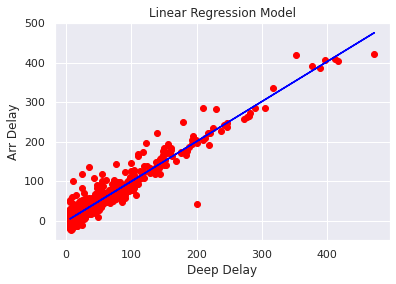

In [57]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Linear Regression Model")
plt.xlabel("Deep Delay")
plt.ylabel("Arr Delay")
plt.show()

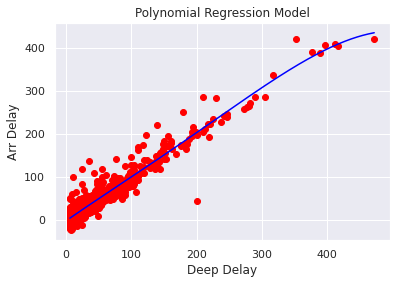

In [58]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
plt.title("Polynomial Regression Model")
plt.xlabel("Deep Delay")
plt.ylabel("Arr Delay")
plt.show()

# Support Vector Machine Regression

In [59]:
# Matrix
X = df_sample.iloc[:, 7:8].values

# Vector
y = df_sample.iloc[:, 0:1].values

- Variable scaling

In [60]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

- Fit SVR Regression with the dataset

In [61]:
from sklearn.svm import SVR

regression = SVR(kernel = "rbf")
regression.fit(X, y)

SVR()

- Prediction of our models with SVR

In [62]:
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform(np.array([[6.5]]))))

- Viewing SVR Results

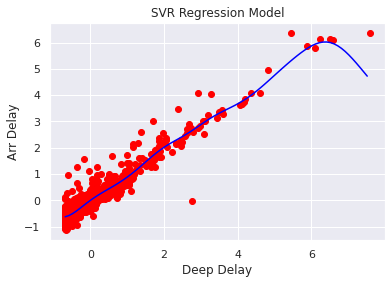

In [63]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("SVR Regression Model")
plt.xlabel("Deep Delay")
plt.ylabel("Arr Delay")
plt.show()

# Decision Tree Regression

In [64]:
# Matrix
X = df_sample.iloc[:, 7:8].values

# Vector
y = df_sample.iloc[:, 0:1].values

- Fit the regression with the dataset

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
regression = DecisionTreeRegressor(random_state = 6858)
regression.fit(X, y)

DecisionTreeRegressor(random_state=6858)

In [67]:
y_pred = regression.predict([[6.5]])

- Visualization the results

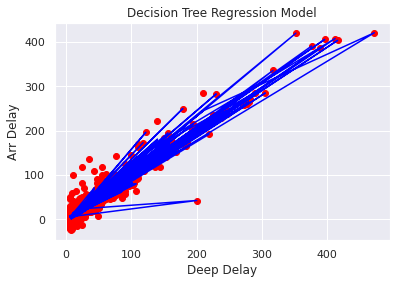

In [68]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Decision Tree Regression Model")
plt.xlabel("Deep Delay")
plt.ylabel("Arr Delay")
plt.show()

# Random Forest Regression

In [74]:
# Matrix
X = df_sample.iloc[:, 7:8].values

# Vector
y = df_sample.iloc[:, 0:1].values

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
regression = RandomForestRegressor(n_estimators = 300, random_state = 6858)
regression.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=6858)

In [83]:
y_pred = regression.predict([[15]])
y_pred

array([13.21299606])

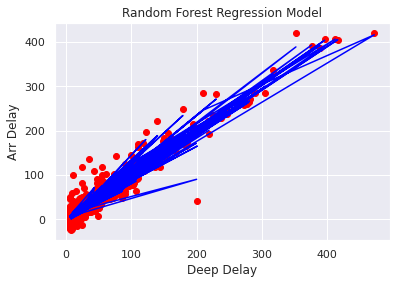

In [78]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Random Forest Regression Model")
plt.xlabel("Deep Delay")
plt.ylabel("Arr Delay")
plt.show()